In [1]:
import os
import numpy as np
import pandas as pd
import pulse2percept as p2p
import p2pspatial

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2017-12-11 12:02:42,817 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
subjects = ['12-005', '51-009', '52-001']
symbols = ['o', 's', 'v']
columns = ['area', 'major_axis_length', 'minor_axis_length', 'orientation']

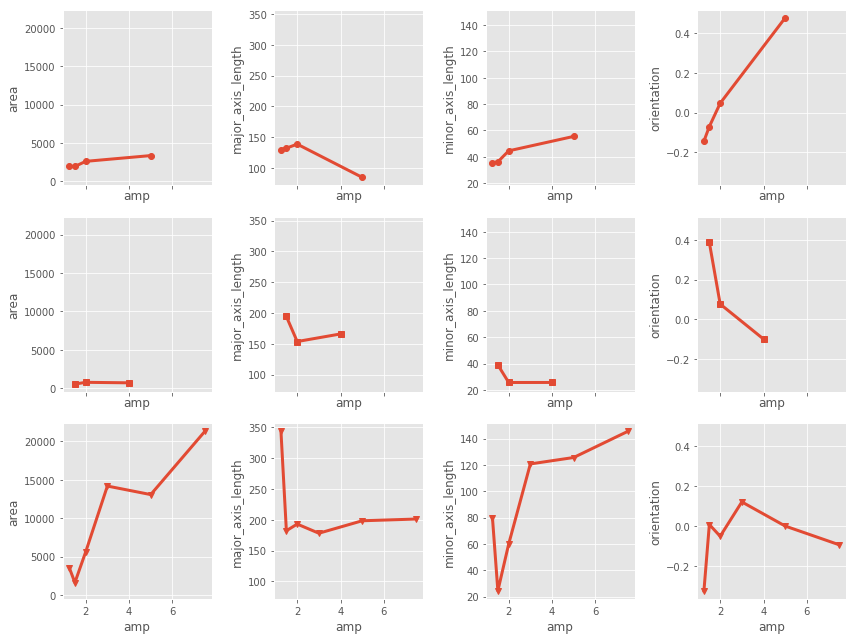

In [3]:
fig, axes = plt.subplots(nrows=len(subjects), ncols=len(columns),
                         sharex=True, sharey='col',
                         figsize=(12, len(subjects) * 3))
for subject, axrow, symbol in zip(subjects, axes, symbols):
    X, y = p2pspatial.load_data(os.path.join(os.environ['SECOND_SIGHT_DATA'], 'shape'),
                                subject=subject)
    Xy = pd.concat((X, y), axis=1)
    summary_stats = Xy.groupby(['amp'])
    for col, ax in zip(columns, axrow):
        data = summary_stats.mean()[col]
        ax.plot(data.keys(), data.values, symbol + '-', linewidth=3)
        ax.set_xlabel('amp')
        ax.set_ylabel(col)
fig.tight_layout()

In [4]:
columns = ['area', 'area normed' 'major_axis_length', 'major_axis_length normed',
           'minor_axis_length', 'minor_axis_length normed',
           'major_axis_length/minor_axis_length', 'orientation']

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


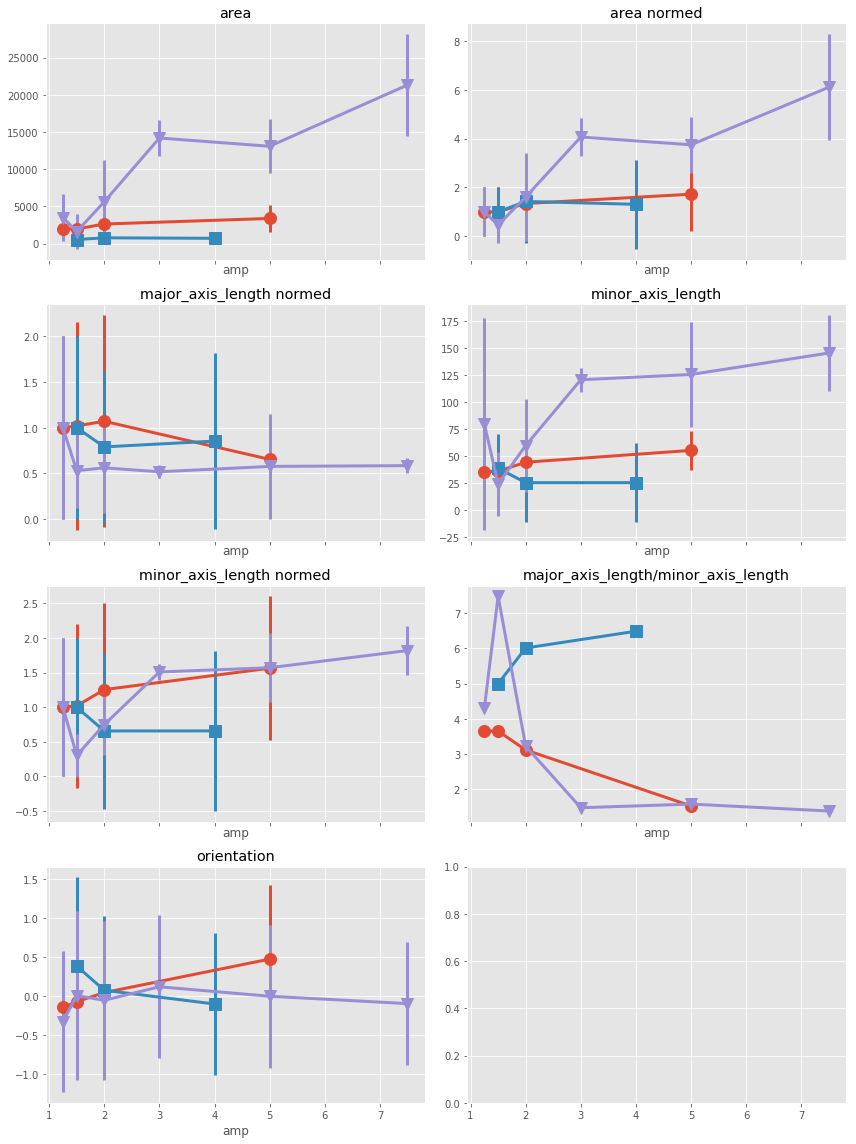

In [10]:
nc = 2
nr = int(np.ceil(len(columns) / nc))
fig, axes = plt.subplots(nrows=nr, ncols=nc, sharex=True, figsize=(12, 4 * nr))
for subject, symbol in zip(subjects, symbols):
    X, y = p2pspatial.load_data(os.path.join(os.environ['SECOND_SIGHT_DATA'], 'shape'),
                                subject=subject)
    Xy = pd.concat((X, y), axis=1)
    summary_stats = Xy.groupby(['amp'])
    for col, ax in zip(columns, axes.ravel()):
        if 'normed' in col:
            col = col.split(' ')[0]
            normed = True
        else:
            normed = False
        
        if '/' in col:
            data = [summary_stats.mean()[c] for c in col.split('/')]
            values = data[0].values / data[1].values
            yerr = np.zeros_like(values)
            keys = data[0].keys()
        else:
            data = summary_stats.mean()[col]
            values = data.values
            yerr = summary_stats.std()[col].values
            keys = data.keys()
        
        if normed:
            values /= values[0]
            yerr /= yerr[0]
        ax.errorbar(keys, values, yerr=yerr, fmt=symbol + '-', markersize=12, linewidth=3, label=subject)
        ax.set_xlabel('amp')
        if normed:
            ax.set_title(col + ' normed')
        else:
            ax.set_title(col)
fig.tight_layout()
plt.legend()